In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # pip install pandas

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.layers import Dense
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
namesList = ['kWh', 'tempmax', 'tempmin', 'temp', 'humidity', 'cloudcover']
dataset = pd.read_csv("DaneBRK3.csv", sep=';', skipinitialspace=True, na_values='?')
dataset = dataset.dropna()

dataset.tail()

,kWh,tempmax,tempmin,temp,humidity,cloudcover
558,29.21,9.3,0.2,4.5,70.6,66.3
559,40.90,13.2,1.8,7.3,60.1,55.2
560,45.83,16.0,0.9,8.5,52.4,8.6
561,45.73,21.9,2.9,12.9,46.5,29.0
562,13.18,14.0,8.9,10.9,78.2,88.3


In [ ]:
train_dataset = dataset.sample(frac=0.9, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(dataset.shape, train_dataset.shape, test_dataset.shape)

(563, 6) (507, 6) (56, 6)


In [ ]:
train_dataset.describe().T


,count,mean,std,min,25%,50%,75%,max
kWh,507.0,19.977870,15.041351,0.0,5.370,17.21,33.385,50.27
tempmax,507.0,11.713215,8.897084,-8.0,4.550,10.90,18.300,32.10
tempmin,507.0,3.247140,7.058900,-13.5,-1.900,2.10,8.150,20.00
temp,507.0,7.419724,7.630172,-10.8,1.450,6.50,12.800,25.30
humidity,507.0,78.713748,12.019874,43.0,71.725,80.08,87.455,99.77
cloudcover,507.0,63.753846,26.342710,0.0,46.300,69.40,86.100,100.00


In [ ]:
print(dataset)

       kWh  tempmax  tempmin  temp  humidity  cloudcover
0    13.32     25.3      7.4  15.9     72.22         3.0
1    17.19     23.0      8.7  15.7     79.57        51.3
2    23.48     22.1     12.3  17.2     82.88        64.8
3     5.40     22.0      9.3  15.6     86.62        67.2
4    12.49     18.0      9.6  14.5     86.04        77.0
..     ...      ...      ...   ...       ...         ...
558  29.21      9.3      0.2   4.5     70.60        66.3
559  40.90     13.2      1.8   7.3     60.10        55.2
560  45.83     16.0      0.9   8.5     52.40         8.6
561  45.73     21.9      2.9  12.9     46.50        29.0
562  13.18     14.0      8.9  10.9     78.20        88.3

[563 rows x 6 columns]


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('kWh')
test_labels = test_features.pop('kWh')

In [ ]:
def plot(feature, x=None, y=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(train_features[feature], train_labels, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature)
    plt.ylabel('kWh')
    plt.legend()

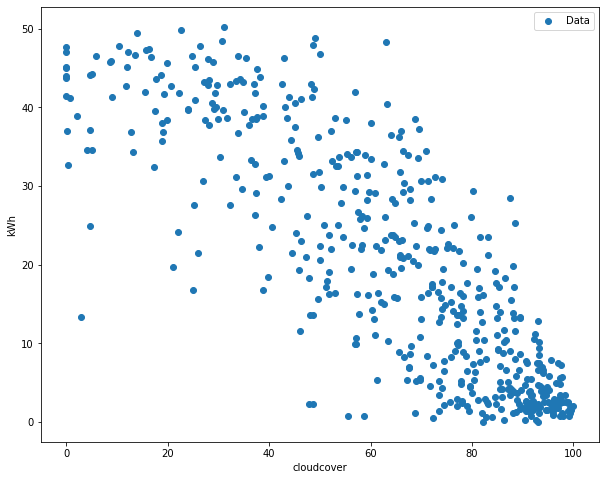

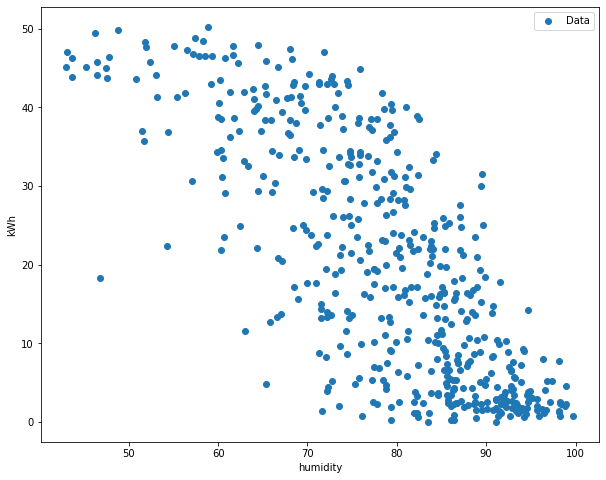

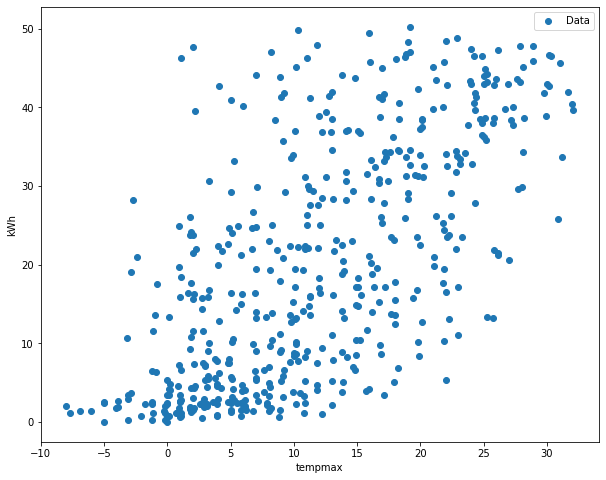

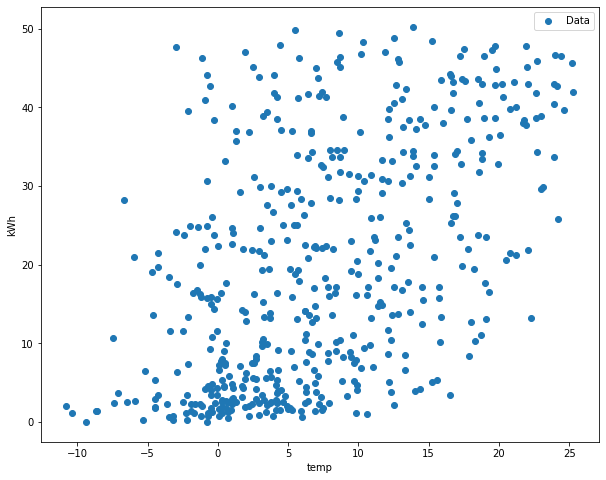

In [ ]:
plot('cloudcover')
plot('humidity')
plot('tempmax')
plot('temp')

In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
loss = keras.losses.MeanAbsoluteError()

In [ ]:
dnn_model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [ ]:
dnn_model.compile(loss=loss, 
                  optimizer=tf.keras.optimizers.Adam(0.001))

dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 5)                11        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,780
Trainable params: 8,769
Non-trainable params: 11
_____________________________________________________

In [ ]:
dnn_model.fit(
    train_features, train_labels,
    validation_split=0.1,
    verbose=1, epochs=150)

Epoch 1/150
15/15 [==============================] - 1s 29ms/step - loss: 19.6218 - val_loss: 17.4224
Epoch 2/150
15/15 [==============================] - 0s 9ms/step - loss: 18.2337 - val_loss: 15.5581
Epoch 3/150
15/15 [==============================] - 0s 7ms/step - loss: 15.7899 - val_loss: 12.7449
Epoch 4/150
15/15 [==============================] - 0s 7ms/step - loss: 11.5508 - val_loss: 9.7631
Epoch 5/150
15/15 [==============================] - 0s 10ms/step - loss: 8.1587 - val_loss: 7.3757
Epoch 6/150
15/15 [==============================] - 0s 9ms/step - loss: 6.4745 - val_loss: 6.0800
Epoch 7/150
15/15 [==============================] - 0s 7ms/step - loss: 6.0009 - val_loss: 6.0062
Epoch 8/150
15/15 [==============================] - 0s 6ms/step - loss: 5.7527 - val_loss: 5.6250
Epoch 9/150
15/15 [==============================] - 0s 6ms/step - loss: 5.4723 - val_loss: 5.6105
Epoch 10/150
15/15 [==============================] - 0s 5ms/step - loss: 5.3257 - val_loss: 5.5114


In [ ]:
dnn_model.evaluate(test_features, test_labels, verbose=1)

2/2 [==============================] - 0s 4ms/step - loss: 3.9208


3.9207632541656494

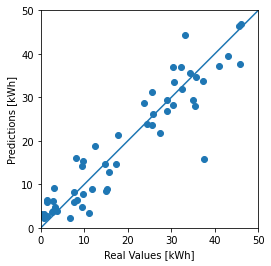

In [ ]:
y = dnn_model.predict(test_features)
a = plt.axes(aspect='equal')
plt.scatter(test_labels, y)
plt.xlabel('Real Values [kWh]')
plt.ylabel('Predictions [kWh]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

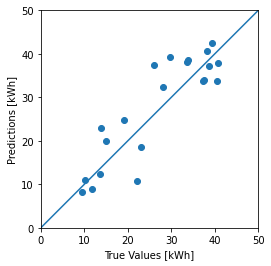

In [ ]:
predict_dataset = pd.read_csv("Energia_i_moc_Miesiąc_obciete_v2.csv", sep=';', skipinitialspace=True, na_values='?')
test_dataset = pd.read_csv("Energia_i_moc_Miesiąc_obciete_v1.csv", sep=';', skipinitialspace=True, na_values='?')
result = test_dataset.pop("kWh");
predict_dataset.describe()
z = dnn_model.predict(predict_dataset)
a = plt.axes(aspect='equal')
plt.scatter(result, z)
plt.xlabel('True Values [kWh]')
plt.ylabel('Predictions [kWh]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)